In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [ ]:
(x_train, y_train), (x_val, y_val) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_val.shape

(10000, 28, 28)

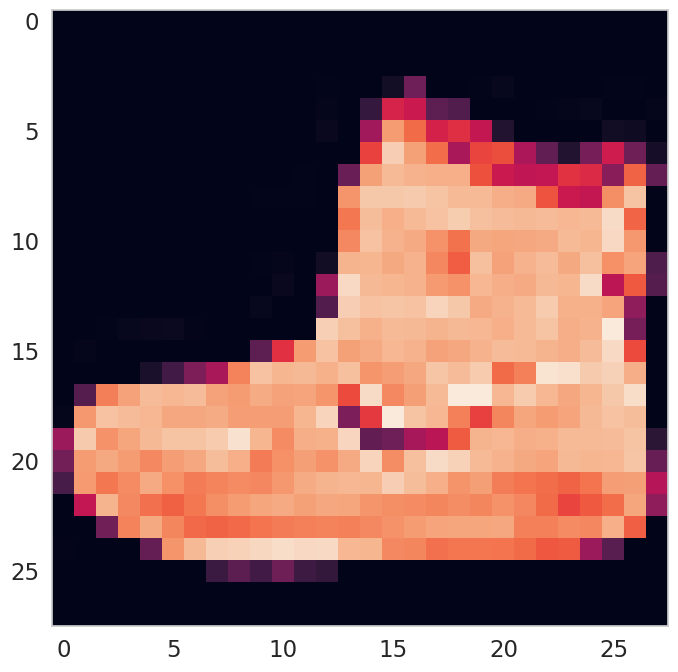

In [ ]:
plt.imshow(x_train[0])
plt.grid(False)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

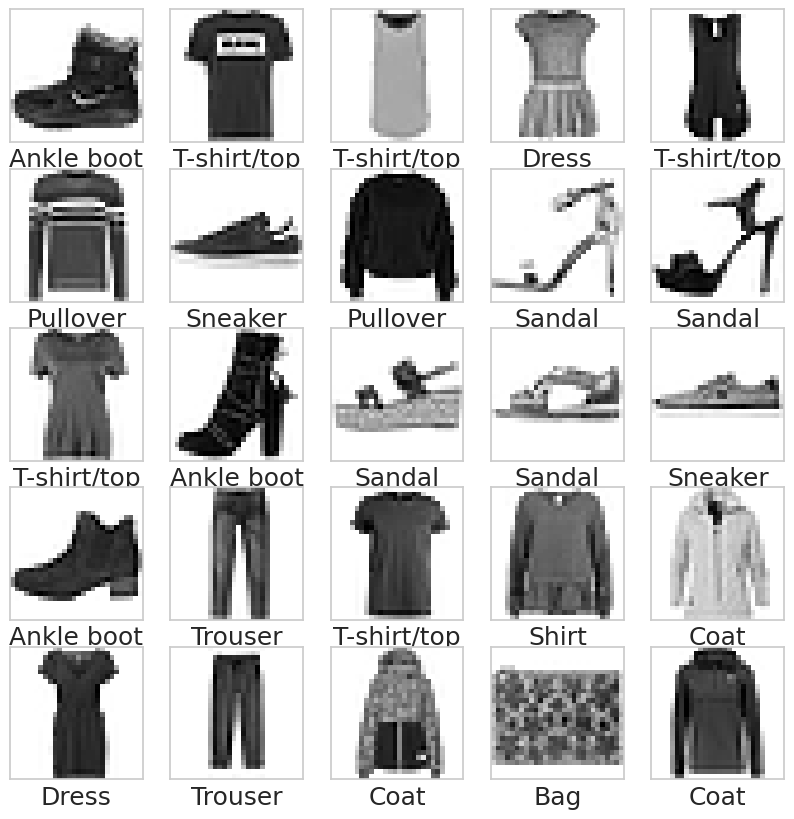

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

In [ ]:
def preprocess(x, y):
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64)

  return x, y

def create_dataset(xs, ys, n_classes=10):
  ys = tf.one_hot(ys, depth=n_classes)
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess) \
    .shuffle(len(ys)) \
    .batch(128)

In [ ]:
train_dataset = create_dataset(x_train, y_train)
val_dataset = create_dataset(x_val, y_val)

model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_dataset.repeat(),
    epochs=10,
    steps_per_epoch=500,
    validation_data=val_dataset.repeat(),
    validation_steps=2
)

Epoch 1/10
500/500 [==============================] - 13s 16ms/step - loss: 0.7137 - accuracy: 0.7390 - val_loss: 0.4240 - val_accuracy: 0.8477
Epoch 2/10
500/500 [==============================] - 9s 17ms/step - loss: 0.4496 - accuracy: 0.8410 - val_loss: 0.4261 - val_accuracy: 0.8398
Epoch 3/10
500/500 [==============================] - 9s 18ms/step - loss: 0.4064 - accuracy: 0.8551 - val_loss: 0.4352 - val_accuracy: 0.8477
Epoch 4/10
500/500 [==============================] - 7s 15ms/step - loss: 0.3798 - accuracy: 0.8643 - val_loss: 0.3946 - val_accuracy: 0.8711
Epoch 5/10
500/500 [==============================] - 9s 18ms/step - loss: 0.3598 - accuracy: 0.8722 - val_loss: 0.3636 - val_accuracy: 0.8711
Epoch 6/10
500/500 [==============================] - 9s 18ms/step - loss: 0.3431 - accuracy: 0.8762 - val_loss: 0.3844 - val_accuracy: 0.8672
Epoch 7/10
500/500 [==============================] - 8s 15ms/step - loss: 0.3343 - accuracy: 0.8792 - val_loss: 0.2580 - val_accuracy: 0.902

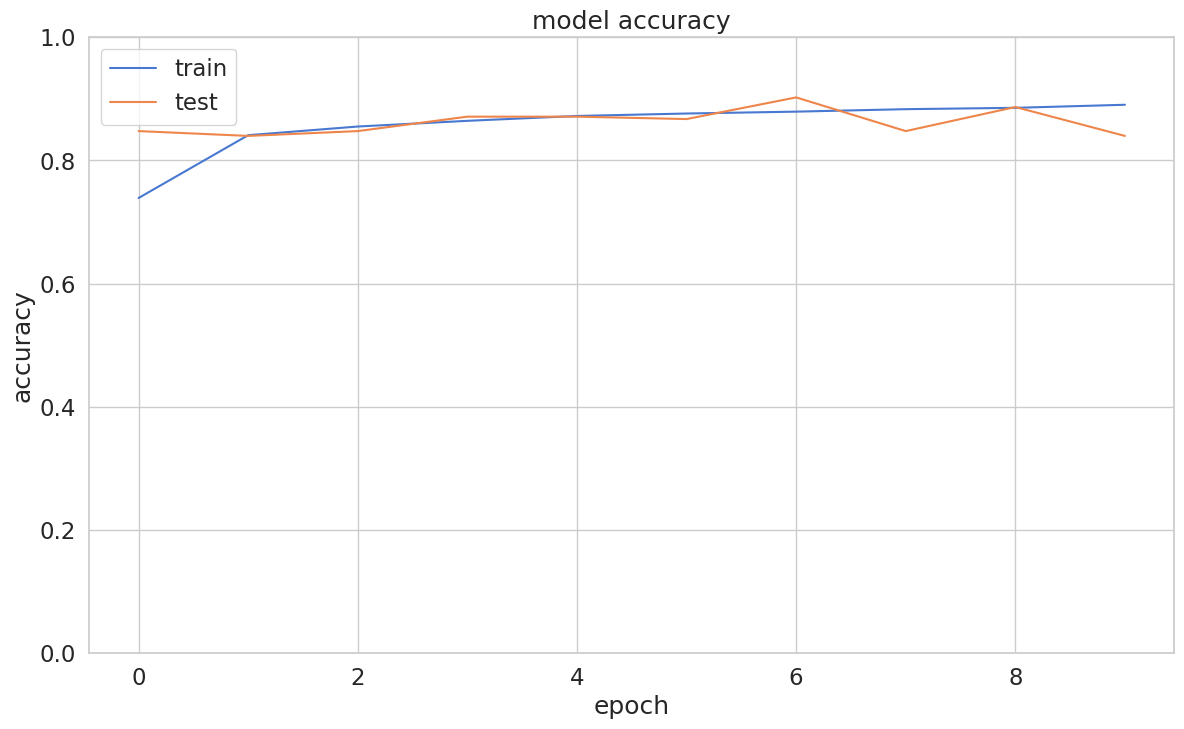

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1)) # Uncomment this when showing you model for pay raise
plt.legend(['train', 'test'], loc='upper left');

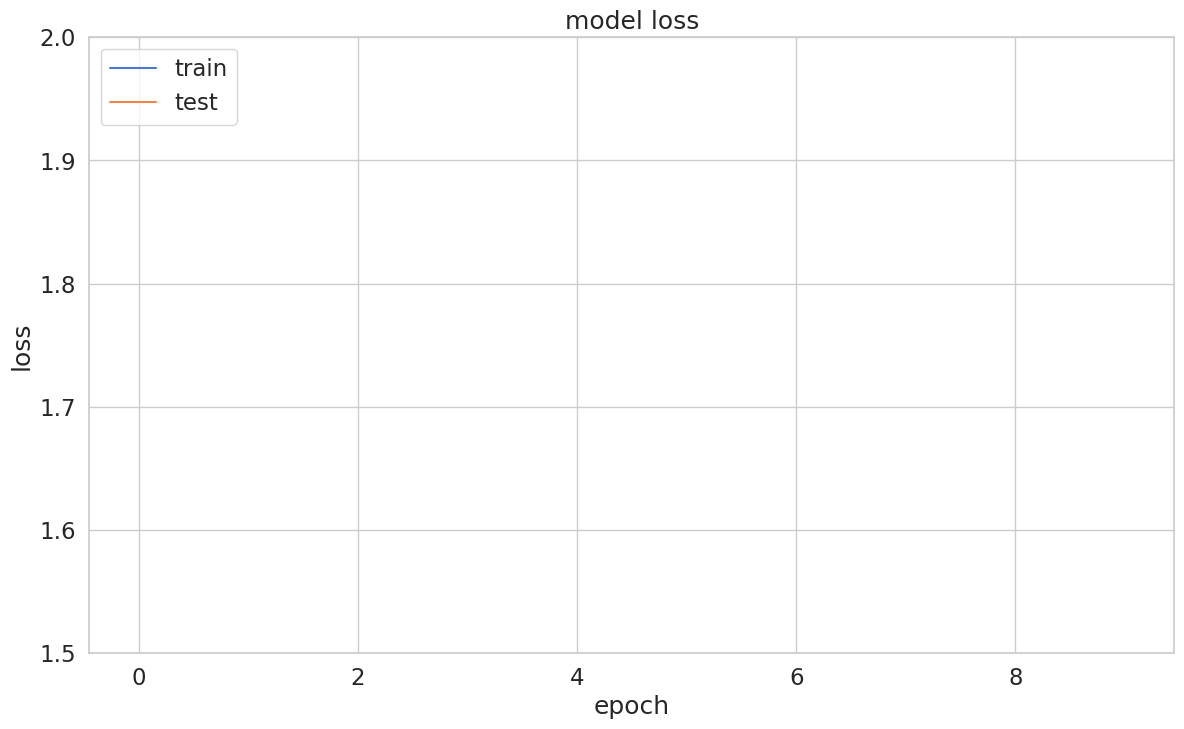

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((1.5, 2))
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(val_dataset)

79/79 [==============================] - 1s 5ms/step


In [ ]:
np.argmax(predictions[0])

4

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("Predicted: {} {:2.0f}% (True: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)


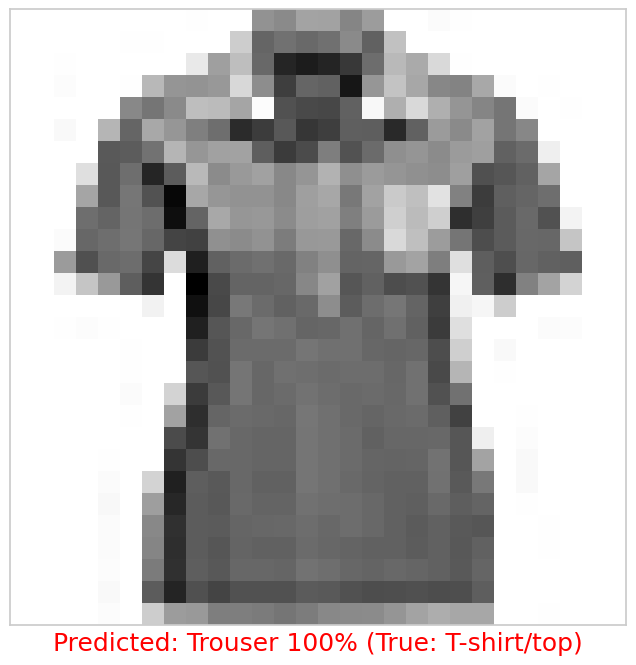

In [ ]:
i = 229
plot_image(i, predictions, y_val, x_val)